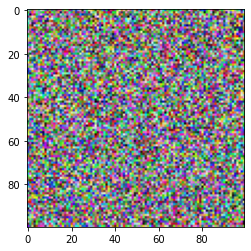

In [4]:
# Used to change filepaths
from pathlib import Path

# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# import numpy to use in this cell
import numpy as np

# import Image from PIL so we can use it later
from PIL import Image

# generate test_data
test_data = np.random.beta(1, 1, size=(100, 100, 3))

# display the test_data
plt.imshow(test_data)

The image size is: (390, 244)


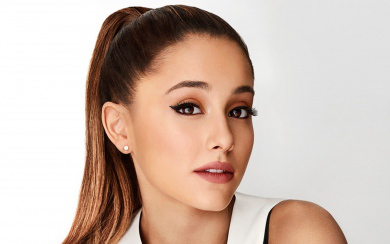

In [5]:
# open the image
img = Image.open("ariana.jpg")

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

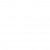

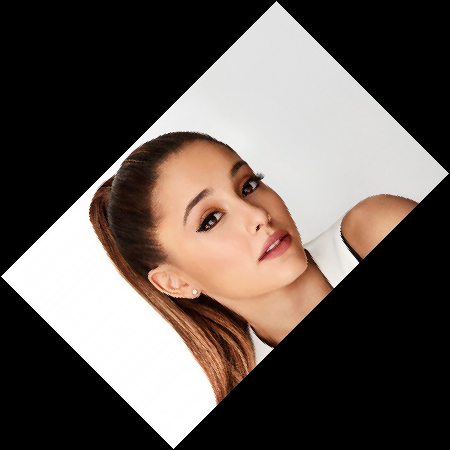

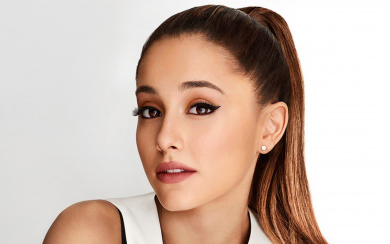

In [6]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop([25, 25, 75, 75])
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our NumPy array has the shape: (244, 390, 3)


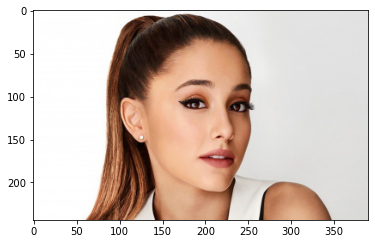

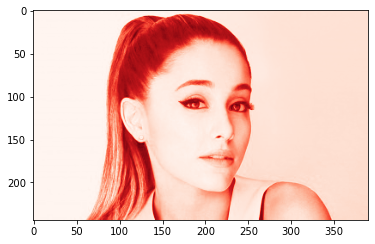

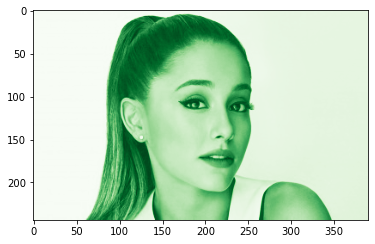

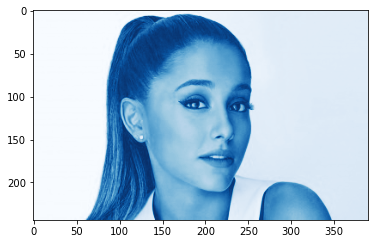

In [7]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow`
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()

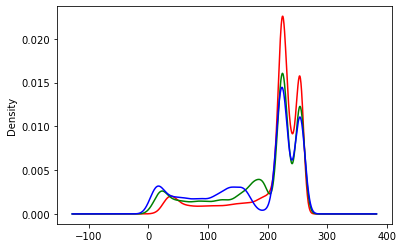

In [8]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)
        
    plt.show()

plot_rgb(img_data)

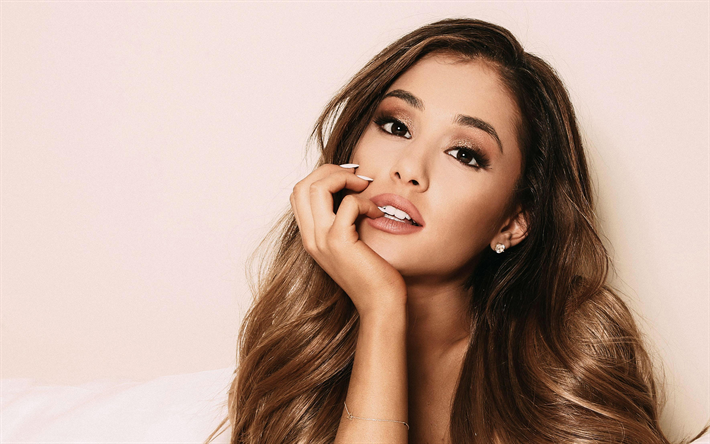

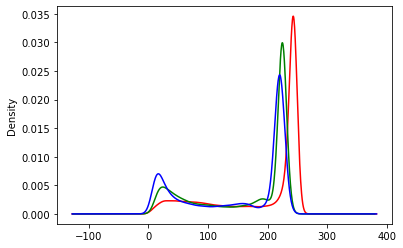

In [16]:
# load ariana2.png as ari
ari = Image.open('ariana2.png')

# display the ari image
display(ari)

# NumPy array of the ari image data
ari_data = np.array(ari)

# plot the rgb densities for the ari image
plot_rgb(ari_data)

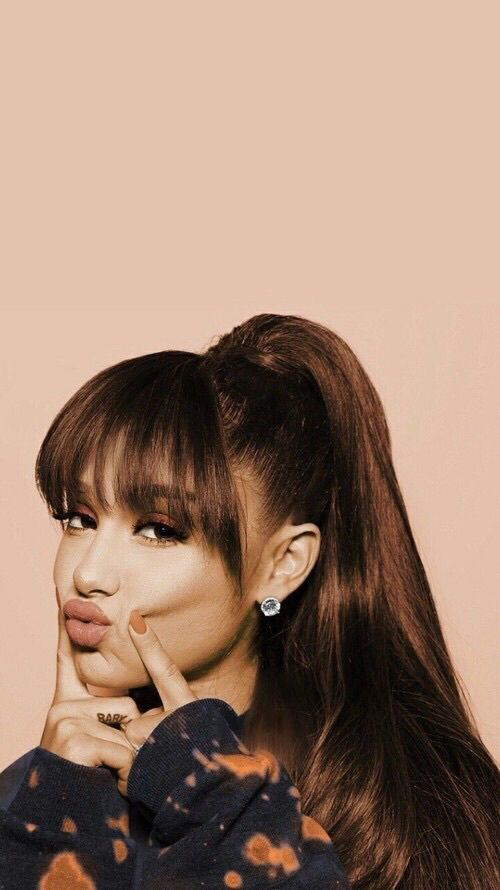

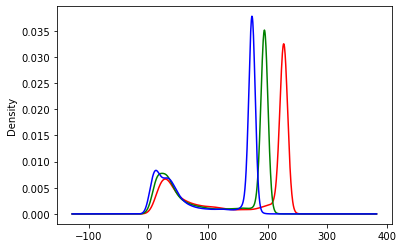

In [17]:
# load ariana4.jpg as ria
ria = Image.open('ariana4.jpg')

# display the ria image
display(ria)

# NumPy array of the ria image data
ria_data = np.array(ria)

# plot the rgb densities for the ria image
plot_rgb(ria_data)

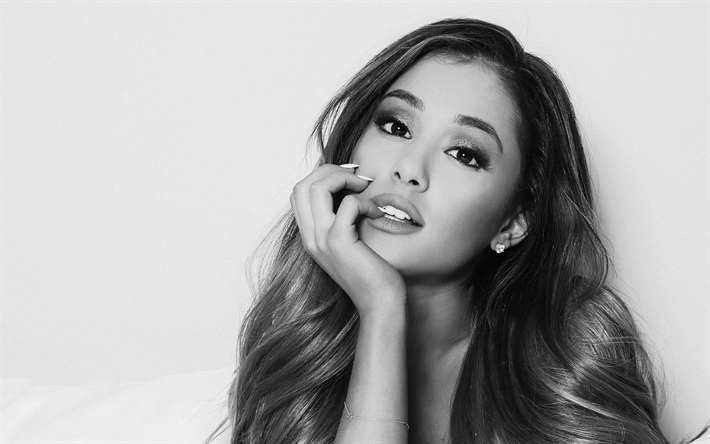

Our NumPy array has the shape: (444, 710)


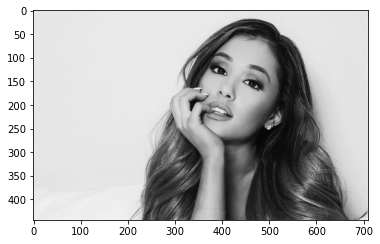

<AxesSubplot:ylabel='Density'>

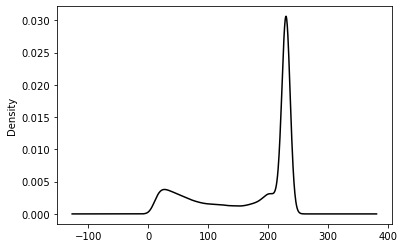

In [18]:
# convert to grayscale
ari_bw = ari.convert("L")
display(ari_bw)

# convert the image to a NumPy array
ari_bw_arr = np.array(ari_bw)

# get the shape of the resulting array
ari_bw_arr_shape = ari_bw_arr.shape
print("Our NumPy array has the shape: {}".format(ari_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(ari_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(ari_bw_arr, 'k')

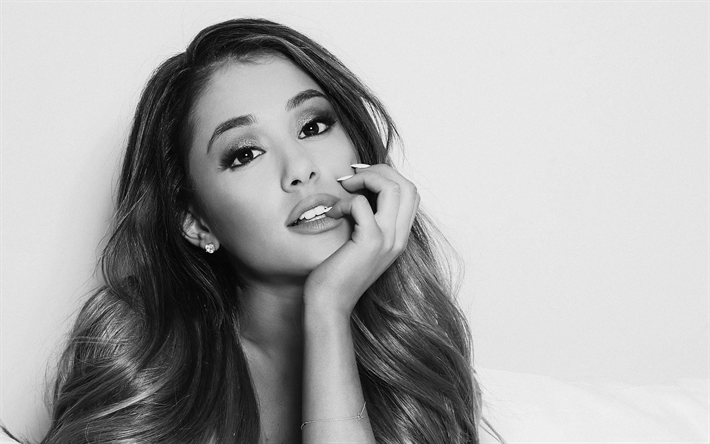

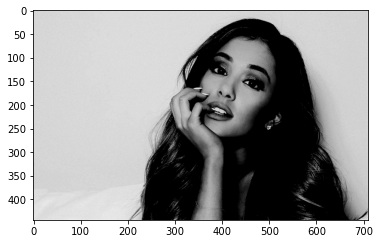

In [19]:
# flip the image left-right with transpose
ari_bw_flip = ari_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(ari_bw_flip)

# save the flipped image
ari_bw_flip.save("ari_flipped.jpg")

# create higher contrast by reducing range
ari_hc_arr = np.maximum(ari_bw_arr, 100)

# show the higher contrast version
plt.imshow(ari_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
ari_bw_hc = Image.fromarray(ari_hc_arr)

# save the high contrast version
honey_bw_hc.save("ari_hc.jpg")